In [41]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [31]:
data = {
    'Store Footfall (weekly)': [161800, 104100, 956900, 1189100, 53400, 33900, 856800, 223600, 45300, 375700, 832600],
    'Weekly Sales Revenue (million £)': [19000, 14000, 110000, 160000, 7000, 5000, 102000, 27000, 6000, 45000, 96000]
}

data = pd.DataFrame(data)
data

,Store Footfall (weekly),Weekly Sales Revenue (million £)
0,161800,19000
1,104100,14000
2,956900,110000
3,1189100,160000
4,53400,7000
5,33900,5000
6,856800,102000
7,223600,27000
8,45300,6000
9,375700,45000


In [110]:
data.describe()

,Store Footfall (weekly),Weekly Sales Revenue (million £)
count,1.100000e+01,11.000000
mean,4.393818e+05,53727.272727
std,4.321506e+05,53840.674047
min,3.390000e+04,5000.000000
25%,7.875000e+04,10500.000000
50%,2.236000e+05,27000.000000
75%,8.447000e+05,99000.000000
max,1.189100e+06,160000.000000


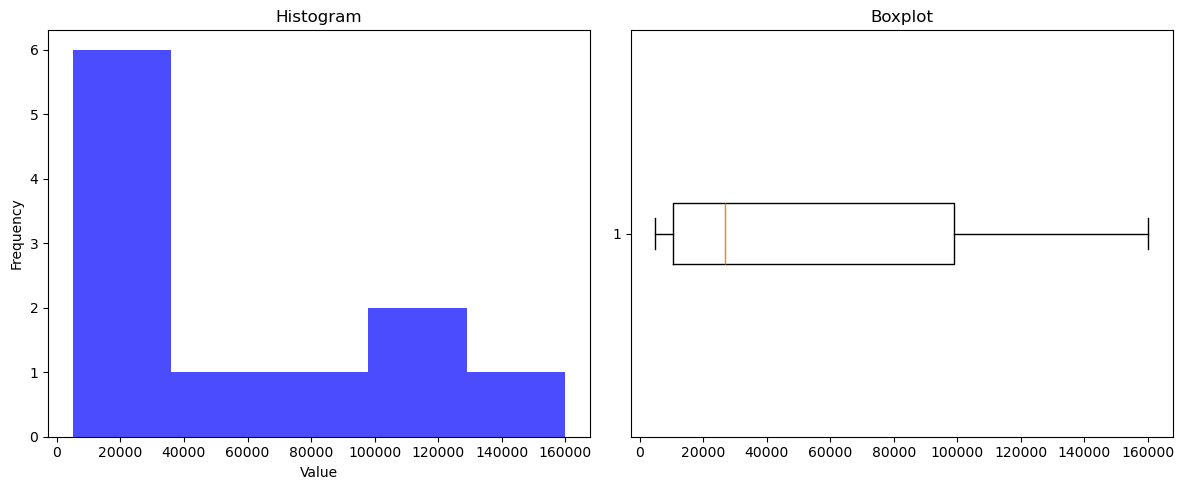

In [65]:
import matplotlib.pyplot as plt
# Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data['Weekly Sales Revenue (million £)'], bins='auto', color='blue', alpha=0.7)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(data['Weekly Sales Revenue (million £)'], vert=False)
plt.title('Boxplot')
plt.tight_layout()
plt.show()

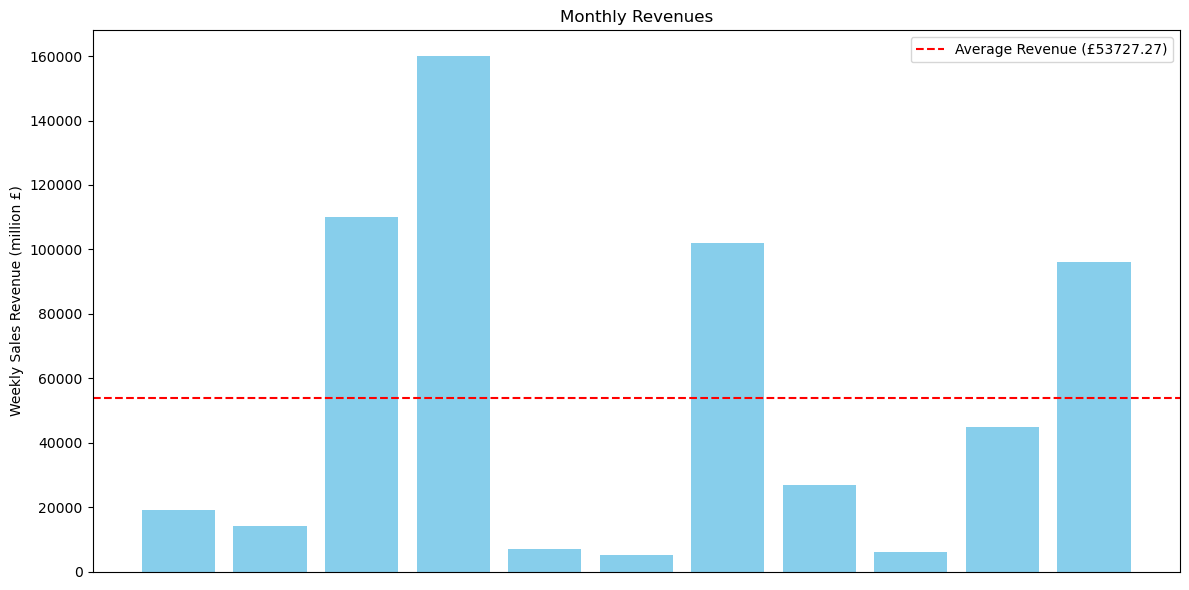

In [136]:
revenues = data['Weekly Sales Revenue (million £)'].values
average_revenue = sum(revenues) / len(revenues)
plt.figure(figsize=(12, 6))
plt.bar(range(len(revenues)), revenues, color='skyblue')
plt.axhline(average_revenue, color='red', linestyle='--', label=f'Average Revenue (£{average_revenue:.2f})')
plt.ylabel('Weekly Sales Revenue (million £)')
plt.title('Monthly Revenues')
plt.xticks([])
plt.legend()
plt.tight_layout()
plt.show()

In [91]:
data

,Store Footfall (weekly),Weekly Sales Revenue (million £)
0,161800,19000
1,104100,14000
2,956900,110000
3,1189100,160000
4,53400,7000
5,33900,5000
6,856800,102000
7,223600,27000
8,45300,6000
9,375700,45000


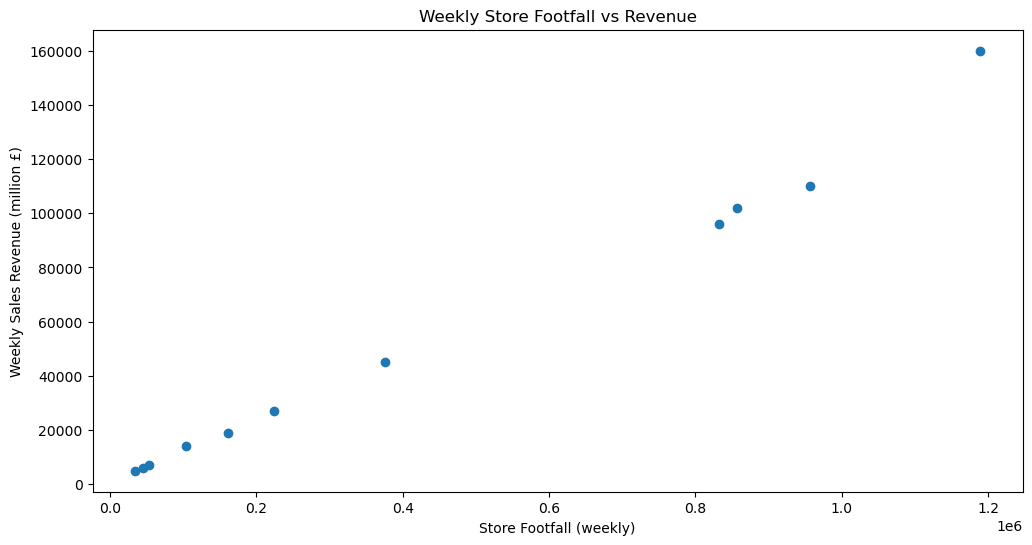

In [108]:
plt.figure(figsize=(12, 6))
plt.scatter(data['Store Footfall (weekly)'],data['Weekly Sales Revenue (million £)'])
plt.xlabel('Store Footfall (weekly)')
plt.ylabel('Weekly Sales Revenue (million £)')
plt.title('Weekly Store Footfall vs Revenue')
plt.show()

In [112]:
data

,Store Footfall (weekly),Weekly Sales Revenue (million £)
0,161800,19000
1,104100,14000
2,956900,110000
3,1189100,160000
4,53400,7000
5,33900,5000
6,856800,102000
7,223600,27000
8,45300,6000
9,375700,45000


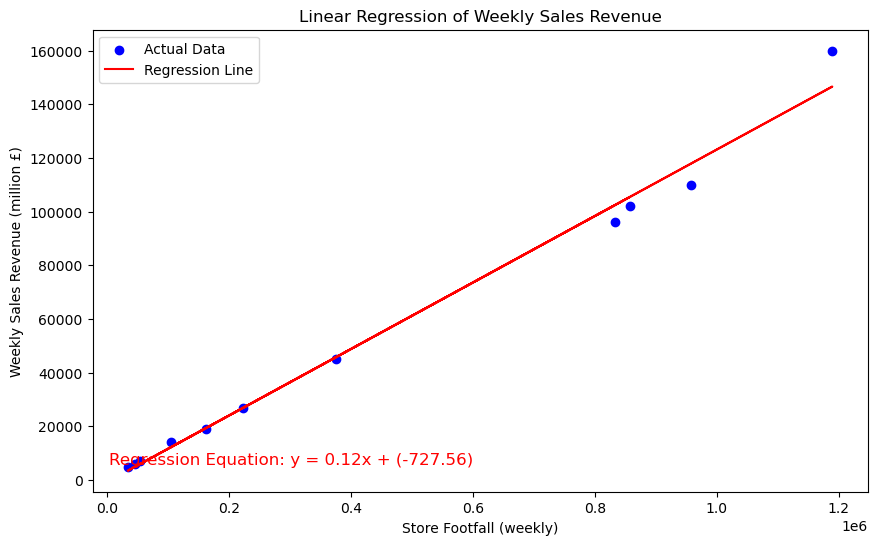

Regression Equation: y = 0.12x + (-727.56)
MSE: 27537705.151427425
R^2: 0.9895504051076529


In [178]:
# Linear Regression
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = sm.add_constant(data['Store Footfall (weekly)'])
y = data['Weekly Sales Revenue (million £)']

# Creating an Ordinary Least Squares (OLS) regression model with statsmodels library
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

# Getting the model parameters for the formula
intercept, slope = model.params

# Calculating MSE and R^2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Plotting the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['Store Footfall (weekly)'], data['Weekly Sales Revenue (million £)'], color='blue', label='Actual Data')
plt.plot(data['Store Footfall (weekly)'], y_pred, color='red', label='Regression Line')
plt.title('Linear Regression of Weekly Sales Revenue')
plt.xlabel('Store Footfall (weekly)')
plt.ylabel('Weekly Sales Revenue (million £)')
plt.legend()

# Adding the regression equation to the plot
plt.text(2500, 6000, f'Regression Equation: y = {slope:.2f}x + ({intercept:.2f})', fontsize=12, color='red')

plt.show()

print(f'Regression Equation: y = {slope:.2f}x + ({intercept:.2f})')

print(f"MSE: {mse}")
print(f"R^2: {r2}")

In [128]:
# Getting the summary of the regression
regression_summary = model.summary()

# Get detailed tables from summary as DataFrames
tables = model.summary2().tables
regression_statistics_df = pd.DataFrame(tables[0])

regression_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Weekly Sales Revenue (million £)   R-squared:                       0.990
Model:                                          OLS   Adj. R-squared:                  0.988
Method:                               Least Squares   F-statistic:                     852.3
Date:                              Sun, 04 May 2025   Prob (F-statistic):           3.17e-10
Time:                                      11:27:31   Log-Likelihood:                -109.83
No. Observations:                                11   AIC:                             223.7
Df Residuals:                                     9   BIC:                             224.5
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -727.5553   2557.156     -0.285      0.782   -6512.243    5057.132
Store Footfall (weekly)     0.1239      0.004     29.194      0.000       0.114       0.134
==============================================================================
Omnibus:                        7.244   Durbin-Watson:                   2.551
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                2.884
Skew:                           1.004   Prob(JB):                        0.236
Kurtosis:                       4.502   Cond. No.                     8.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

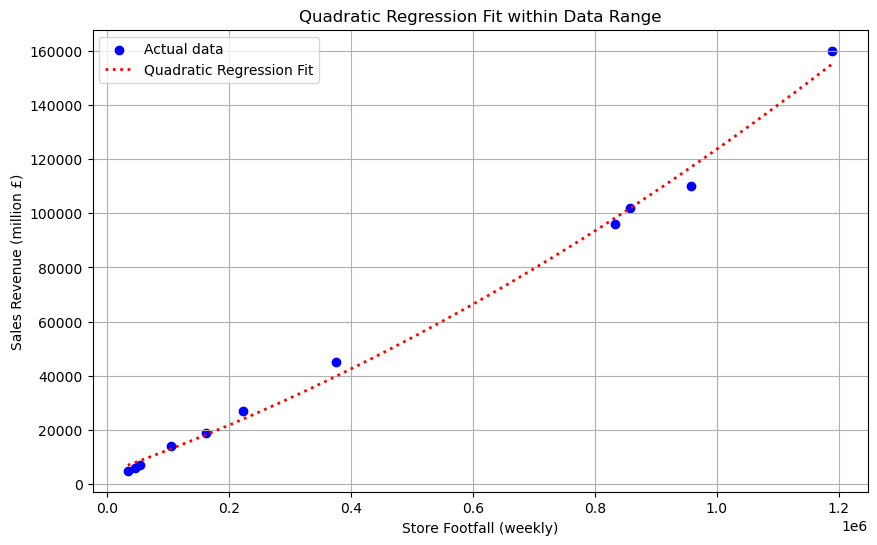

y = 0.0000000394x² + (0.0801)x + (4256.8436)
MSE: 11185842.996709982
R^2: 0.9957553642468658


In [224]:
## Non Linear Regression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
X = data[['Store Footfall (weekly)']]
y = data['Weekly Sales Revenue (million £)'].values
# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


# Add a constant to the features for the intercept
X_poly= sm.add_constant(X_poly)

# Fit the model using Ordinary Least Squares
model = sm.OLS(y, X_poly).fit()

# Predictions
y_pred = model.predict(X_poly)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Getting the model parameters for the formula
const, x1,x2 = model.params

# Since coefs will have three values including the coefficient for the intercept term
equation = f'y = {x2:.10f}x² + ({x1:.4f})x + ({const:.4f})'

# Prepare the range for plotting
x_range = np.linspace(X['Store Footfall (weekly)'].min(), X['Store Footfall (weekly)'].max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

# Generate the plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(x_range, y_range_pred, color='red', linestyle=':', linewidth=2, label='Quadratic Regression Fit')
plt.title('Quadratic Regression Fit within Data Range')
plt.xlabel('Store Footfall (weekly)')
plt.ylabel('Sales Revenue (million £)')
#plt.text(500, 19000, equation, fontsize=12)  # Display the equation on the plot
plt.legend()
plt.grid(True)
plt.show()

# Calculating MSE and R^2
print(equation)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")

In [218]:
# Getting the summary of the regression
regression_summary = model.summary()

# Get detailed tables from summary as DataFrames
tables = model.summary2().tables
regression_statistics_df = pd.DataFrame(tables[0])

regression_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     938.4
Date:                Sun, 04 May 2025   Prob (F-statistic):           3.25e-10
Time:                        11:43:15   Log-Likelihood:                -104.87
No. Observations:                  11   AIC:                             215.7
Df Residuals:                       8   BIC:                             216.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4256.8436   2261.104      1.883      0.097    -957.271    9470.959
x1             0.0801      0.013      6.089      0.000       0.050       0.110
x2           3.94e-08   1.15e-08      3.420      0.009    1.28e-08     6.6e-08
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   3.111
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.144
Skew:                          -0.228   Prob(JB):                        0.930
Kurtosis:                       2.672   Cond. No.                     1.14e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The non-linear regression model is used because there is more R2 and a smaller mse, and the model fitting effect is better than that of linear Regression**